In [2]:
import numpy as np
import pandas as pd
from ISLP import load_data
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Exercise 5

In [3]:
Default = load_data('Default')
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [4]:
X = Default.drop(columns=['default','student'])
X = sm.add_constant(X)
y = Default.default.map({'No':0, 'Yes':1})

In [5]:
#a)
model = sm.GLM(y,
               X,
               family=sm.families.Binomial()
              )
results = model.fit()
predictions = pd.Series(results.predict()).apply(lambda x: 1 if x >= 0.5 else 0)
accuracy = np.mean(predictions == y)
print(f'Accuracy = {accuracy*100:.2f}%')

Accuracy = 97.37%


In [6]:
#b)
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  random_state=1
                                                 )
model = sm.GLM(y_train,
               X_train,
               family=sm.families.Binomial()
              )
results = model.fit()
predictions = pd.Series(results.predict(X_val)).apply(lambda x: 1 if x >= 0.5 else 0)
accuracy = np.mean(predictions == y_val)
print(f'Accuracy = {accuracy*100:.2f}%')

Accuracy = 97.48%


In [7]:
for i in range(3):
    X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                 random_state=i
                                                 )
    model = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial()
                  )
    results = model.fit()
    predictions = pd.Series(results.predict(X_val)).apply(lambda x: 1 if x >= 0.5 else 0)
    accuracy = np.mean(predictions == y_val)
    print(f'Accuracy = {accuracy*100:.2f}%')
    

Accuracy = 97.12%
Accuracy = 97.48%
Accuracy = 97.44%


# Exercise 6

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  random_state=0
                                             )
model = sm.GLM(y_train,
               X_train,
               family=sm.families.Binomial()
              )
results = model.fit()
predictions = pd.Series(results.predict(X_val)).apply(lambda x: 1 if x >= 0.5 else 0)
accuracy = np.mean(predictions == y_val)
print(f'Accuracy = {accuracy*100:.2f}%')
results.summary()

Accuracy = 97.12%


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7497
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -574.73
Date:                Thu, 14 Nov 2024   Deviance:                       1149.5
Time:                        09:19:58   Pearson chi2:                 3.49e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1195
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3110      0.502    -22.524      0.000     -12.295     -10.327
balance        0.0056      0.000     21.171      0.000       0.005       0.006
income      1.619e-05   5.86e-06      2.765      0.006    4.71e-06    2.77e-05
==============================================================================
"""

In [42]:
def boot_fn(data, index):
    sample = data.iloc[index]

    X = sample.drop('default', axis=1)
    y = sample.default

    model = sm.GLM(y,
                   X,
                   family=sm.families.Binomial()
                  )
    results = model.fit()
    return results.params


df = pd.concat([X, y], axis=1)
n = df.shape[0]

n_iter = 100
rng = np.random.default_rng(seed=0)

bootstrap_results = []
for b in range(n_iter):
    index = rng.integers(n, size=n)
    coeffs = boot_fn(df, index)
    bootstrap_results.append(coeffs)

n_coeffs = len(bootstrap_results[0])
for i in range(1, n_coeffs):
    name = bootstrap_results[0].index[i]
    coefficient_results = [results.iloc[i] for results in bootstrap_results]
    mean = np.mean(coefficient_results)
    std = np.std(coefficient_results)
    print(f'Feature = {name}')
    print(f'Coefficient estimation = {mean:}')
    print(f'Standard error = {std}') 
    print(' ')
    


    
    
    

Feature = balance
Coefficient estimation = 0.005670005536816104
Standard error = 0.0002111856054882717
 
Feature = income
Coefficient estimation = 2.0464448745637254e-05
Standard error = 4.6858743638836686e-06
 


# Exercise 7

In [67]:
from sklearn.model_selection import cross_validate, LeaveOneOut
from sklearn.linear_model import LogisticRegression

df = load_data('Weekly')

features = ['Lag1', 'Lag2']
X = df[features]
# X = sm.add_constant(X)
y = df.Direction.map({'Down':0, 'Up':1})
y = np.asarray(y)



In [68]:

model = LogisticRegression(penalty=None)
results = model.fit(X,y)
results.coef_

array([[-0.03872133,  0.06024715]])

In [71]:
cv = LeaveOneOut()
CV = cross_validate(model,
               X,
               y,
               cv=cv
              )
print(f'Estimate of prediction error = {np.mean(CV['test_score']):.2f}')

Estimate of prediction error = 0.55


# Exercise 8

In [73]:
# a)
rng = np.random. default_rng (1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

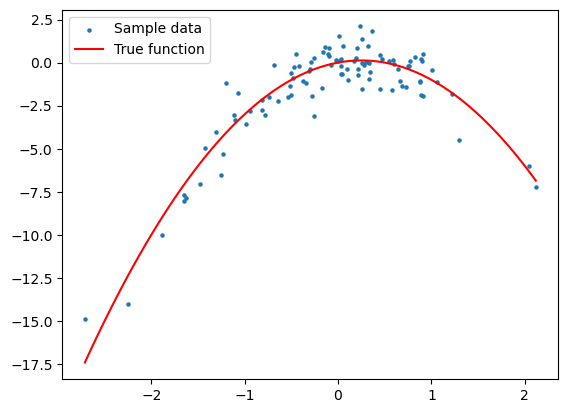

In [86]:
#b)
import matplotlib.pyplot as plt
x_range = np.linspace(min(x), max(x), 100)

plt.scatter(x,y, label='Sample data', s=5)
plt.plot(x_range, x_range - 2 * x_range**2, color='r', label='True function')
plt.legend()

In [119]:
df = pd.DataFrame({'X': x,
                   'X^2' : x ** 2,
                   'X^3': x ** 3,
                   'X^4': x ** 4
                  })
cv = LeaveOneOut()

degree_results = {'errors': [],
              'parameters':[],
                  'std': []
             }
linear_results = []
params = []
model = LinearRegression()
for degree in range(4):
    CV = cross_validate(model,
                        df.iloc[:,:degree+1],
                        y,
                        cv=cv,
                        scoring='neg_mean_squared_error',
                        return_estimator=True
                       )
    degree_results['errors'].append(np.mean(CV['test_score']))
    coefficients = [estimator.coef_ for estimator in CV['estimator']]
    degree_results['parameters'].append([np.mean([x[i] for x in coefficients]) for i in range(len(coefficients[0]))])
    degree_results['std'].append([np.std([x[i] for x in coefficients]) for i in range(len(coefficients[0]))])
    
    
    model_sm = sm.OLS(y, df.iloc[:,:degree+1])
    results = model_sm.fit()
    linear_results.append(results)
    



In [122]:
for i in range(4):
    print(linear_results[i].summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.285
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              39.49
Date:                Thu, 14 Nov 2024   Prob (F-statistic):                    8.88e-09
Time:                        11:55:03   Log-Likelihood:                         -246.20
No. Observations:                 100   AIC:                                      494.4
Df Residuals:                      99   BIC:                                      497.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------